In [2]:
import pandas as pd

# 读取更新后的数据
df = pd.read_excel('merged_blockchain_data.xlsx')

In [3]:
# 去重操作，只保留每个证券代码在每个行业中的唯一记录
df_unique = df.drop_duplicates(subset=['Stkcd', 'Indcd', 'Indnme'])

# 统计每个行业代码对应的唯一证券代码数量，同时保留行业名称
industry_counts = df_unique.groupby(['Indcd', 'Indnme']).size().reset_index(name='证券代码数量')

# 按证券代码数量降序排列
industry_counts = industry_counts.sort_values(by='证券代码数量', ascending=False)

# 输出结果
print(industry_counts.head(10))

   Indcd            Indnme  证券代码数量
29   I65        软件和信息技术服务业     106
17   C39  计算机、通信和其他电子设备制造业      32
28   I64          互联网和相关服务      20
16   C38        电气机械及器材制造业      15
14   C35           专用设备制造业       8
37   R85            新闻和出版业       7
33   L72             商务服务业       7
13   C34           通用设备制造业       7
20   E48           土木工程建筑业       5
23   F52               零售业       5


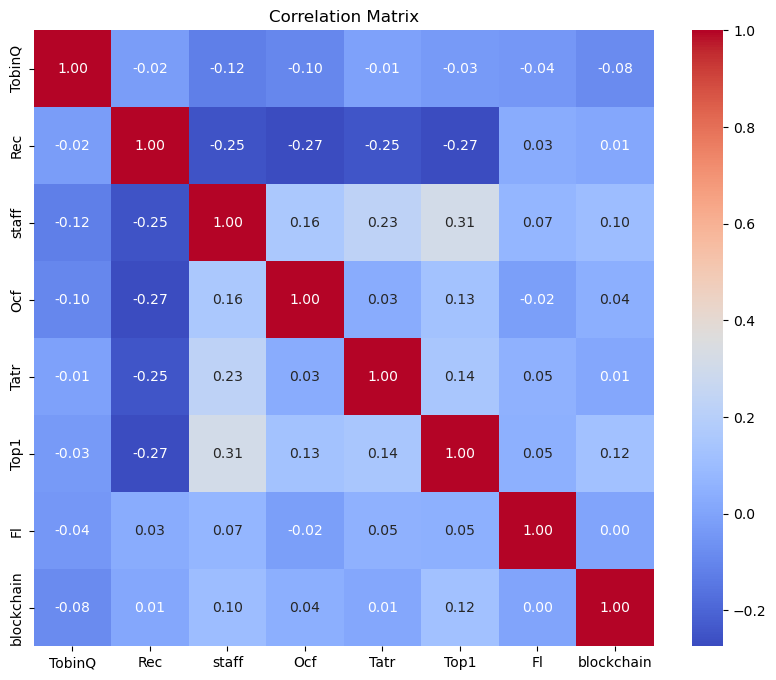

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df['blockchain'] = (df['Year'] >= df['提取年份']).astype(int)

# 选择特定的列
columns_of_interest = ['TobinQ', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl', 'blockchain']

# 计算相关性矩阵
corr_matrix = df[columns_of_interest].corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [5]:
df.describe()

,Stkcd,TobinQ,Rec,staff,Ocf,Tatr,Top1,Fl,提取年份,Year,blockchain
count,1676.000000,1676.000000,1672.000000,1676.000000,1676.000000,1674.000000,1676.000000,1647.000000,1676.000000,1676.000000,1676.000000
mean,256772.196897,2.513334,0.354014,7.755565,0.040435,0.565787,16.361822,1.218467,2019.211217,2018.615752,0.489260
std,230201.999441,3.684464,0.265932,1.264207,0.065611,0.533629,14.849362,1.487393,1.575035,2.741232,0.500034
min,21.000000,0.641347,0.000029,2.833213,-0.741847,0.016227,0.011300,-20.199620,2017.000000,2014.000000,0.000000
25%,2404.000000,1.422127,0.170342,6.885764,0.008348,0.324585,5.021025,0.960846,2018.000000,2016.000000,0.000000
50%,300188.000000,1.941160,0.290539,7.635545,0.040587,0.462711,10.215350,1.019430,2019.000000,2019.000000,0.000000
75%,300688.000000,2.768782,0.489113,8.480840,0.073015,0.632646,25.528750,1.212055,2020.000000,2021.000000,1.000000
max,688611.000000,102.429555,3.272615,12.444002,0.382178,7.375382,64.143300,31.406145,2024.000000,2023.000000,1.000000


In [6]:
df['提取年份'].value_counts().sort_index()

提取年份
2017     96
2018    460
2019    680
2020    239
2021     25
2022     57
2023     49
2024     70
Name: count, dtype: int64

In [7]:
df['Indcd'].value_counts()

Indcd
I65    624
C39    205
I64     81
C38     75
C35     52
R85     41
L72     41
C34     37
G55     31
C40     31
C23     26
C22     26
F51     24
F52     22
K70     21
E48     19
M74     17
C29     16
C26     14
R87     13
I63      9
A01      9
G58      9
C17      8
C18      7
E50      7
J67      7
A03      6
G60      6
C24      6
R86      5
Q83      5
J69      4
C37      4
C33      3
D44      3
O80      2
S90      2
C27      2
C25      1
A05      1
Name: count, dtype: int64

#### 1.线性回归

In [8]:
import numpy as np
import statsmodels.api as sm
# 备份原始数据
df_backup = df.copy()

# 数据预处理
df_backup['Stkcd'] = df_backup['Stkcd'].apply(lambda x: f"{int(x):06d}")
df_backup['blockchain'] = (df_backup['Year'] >= df_backup['提取年份']).astype(int)

# 对变量进行对数变换
df_backup['log_TobinQ'] = np.log(df_backup['TobinQ'] + 1)

# 检查并处理缺失值和无穷值
df_backup = df_backup.replace([np.inf, -np.inf], np.nan).dropna()

# 定义因变量和自变量
y = df_backup['log_TobinQ']
X = df_backup[['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl']]

# 添加常数项
X = sm.add_constant(X)

# 构建回归模型
model = sm.OLS(y, X).fit()

# 输出结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_TobinQ   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     23.55
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.68e-30
Time:                        15:20:00   Log-Likelihood:                -609.02
No. Observations:                1495   AIC:                             1234.
Df Residuals:                    1487   BIC:                             1277.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7244      0.066     25.967      0.0

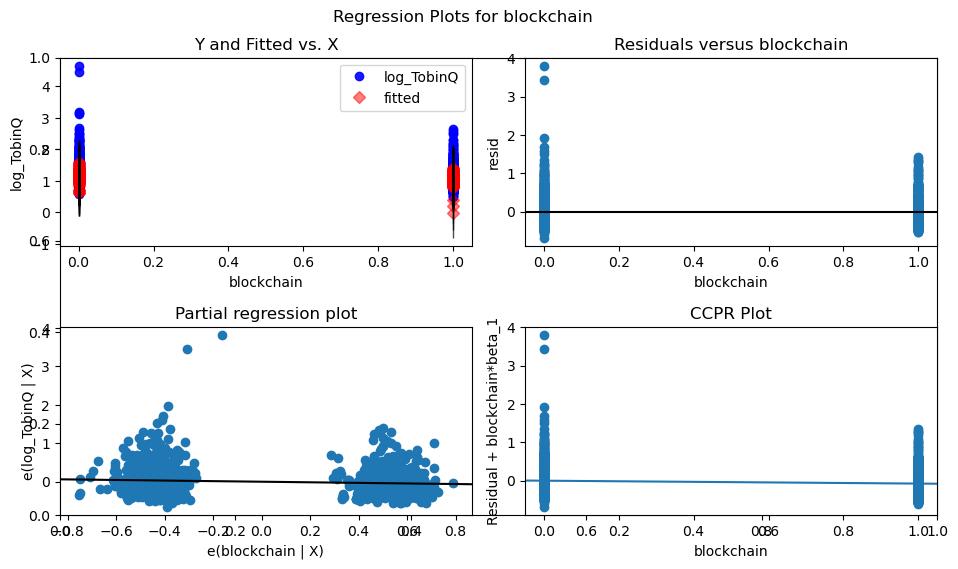

In [9]:
# 回归结果可视化
import statsmodels.api as sm

# 构建回归模型
X = df_backup[['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl']]
X = sm.add_constant(X)
y = df_backup['log_TobinQ']
model = sm.OLS(y, X).fit()

# 绘制残差图
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.plot_regress_exog(model, 'blockchain', fig=fig)
plt.show()

C:\Users\周悦\AppData\Local\Temp\ipykernel_10336\2655815964.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y=conf.index, data=conf, palette='viridis')


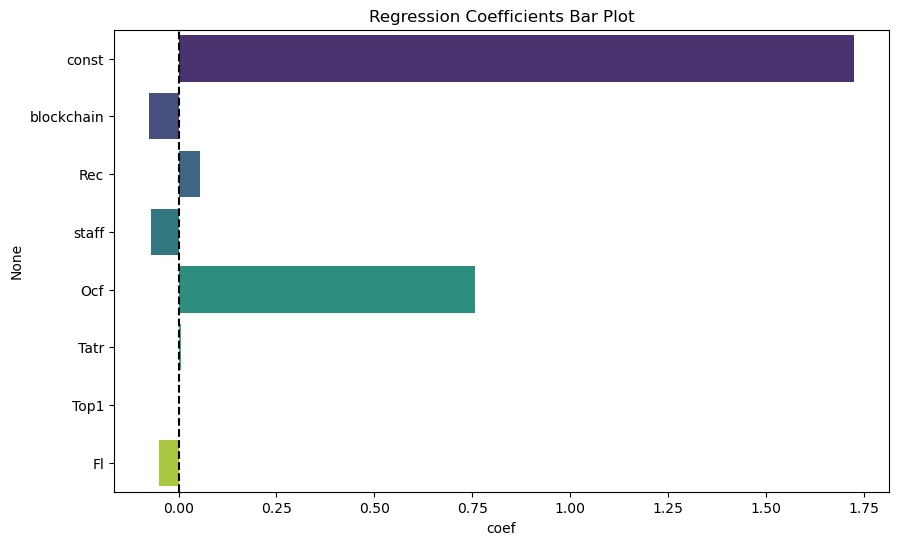

In [10]:
# 提取回归系数和置信区间
coef = model.params
conf = model.conf_int()
conf['coef'] = coef

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x='coef', y=conf.index, data=conf, palette='viridis')
plt.axvline(x=0, color='k', linestyle='--')
plt.title('Regression Coefficients Bar Plot')
plt.show()

#### 2.检查内生性问题

In [11]:
import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare
from scipy import stats

# 设置MultiIndex
df_backup = df_backup.set_index(['Stkcd', 'Year'])

# 定义因变量和自变量
y = df_backup['log_TobinQ']
X = df_backup[['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl']]
X = sm.add_constant(X)

# 构建固定效应模型
fixed_effects_model = PanelOLS(y, X, entity_effects=True).fit()

# 构建随机效应模型
random_effects_model = RandomEffects(y, X).fit()

# 进行豪斯曼检验
def hausman_test(fe_model, re_model):
    b = fe_model.params
    B = re_model.params
    v_b = fe_model.cov
    v_B = re_model.cov
    df = b.shape[0]
    chi2 = (b - B).T @ np.linalg.inv(v_b - v_B) @ (b - B)
    p_value = stats.chi2.sf(chi2, df)
    return chi2, p_value

chi2, p_value = hausman_test(fixed_effects_model, random_effects_model)

# 输出结果
print("Hausman Test Chi-Square Statistic:", chi2)
print("Hausman Test P-Value:", p_value)

# 比较模型
comparison = compare({'Fixed Effects': fixed_effects_model, 'Random Effects': random_effects_model})
print(comparison)

Hausman Test Chi-Square Statistic: 102.71487408279611
Hausman Test P-Value: 1.1885390075732312e-18
                    Model Comparison                    
                         Fixed Effects    Random Effects
--------------------------------------------------------
Dep. Variable               log_TobinQ        log_TobinQ
Estimator                     PanelOLS     RandomEffects
No. Observations                  1495              1495
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.1394            0.1450
R-Squared (Within)              0.1394            0.1259
R-Squared (Between)            -0.1323            0.0429
R-Squared (Overall)            -0.0551            0.0484
F-statistic                     28.976            36.036
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
const                           2.1424            1.9276
                              (14.418)        

- 结果表示固定效应模型和随机效应模型之间存在显著差异，由于豪斯曼检验的P值非常小，固定效应模型更适合数据
- blockchain 变量显著：无论是固定效应模型还是随机效应模型，blockchain 变量都显著且为负，表示区块链技术应用对企业价值（log_TobinQ）有负向影响。

#### 3.滞后变量法

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

# 读取数据
df = pd.read_excel('merged_blockchain_data.xlsx')

# 备份原始数据
df_lagged = df.copy()

# 数据预处理
df_lagged['Stkcd'] = df_lagged['Stkcd'].apply(lambda x: f"{int(x):06d}")
df_lagged['blockchain'] = (df_lagged['Year'] >= df_lagged['提取年份']).astype(int)

# 创建滞后变量
df_lagged = df_lagged.sort_values(by=['Stkcd', 'Year'])
df_lagged['blockchain_lag'] = df_lagged.groupby('Stkcd')['blockchain'].shift(1)
df_lagged['TobinQ_lag'] = df_lagged.groupby('Stkcd')['TobinQ'].shift(1)

# 删除包含滞后变量缺失值的行
df_lagged = df_lagged.dropna(subset=['blockchain_lag', 'TobinQ_lag'])

# 对变量进行对数变换
df_lagged['log_TobinQ'] = np.log(df_lagged['TobinQ'] + 1)
df_lagged['log_TobinQ_lag'] = np.log(df_lagged['TobinQ_lag'] + 1)

# 设置MultiIndex
df_lagged = df_lagged.set_index(['Stkcd', 'Year'])

# 定义因变量和自变量
y = df_lagged['log_TobinQ']
X = df_lagged[['blockchain_lag', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl']]
X = sm.add_constant(X)

# 构建固定效应模型
fixed_effects_model = PanelOLS(y, X, entity_effects=True).fit()

# 输出结果
print(fixed_effects_model.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:             log_TobinQ   R-squared:                        0.0998
Estimator:                   PanelOLS   R-squared (Between):             -0.3159
No. Observations:                1410   R-squared (Within):               0.0998
Date:                Thu, Feb 06 2025   R-squared (Overall):             -0.1459
Time:                        15:20:01   Log-likelihood                    33.064
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      18.510
Entities:                         234   P-value                           0.0000
Avg Obs:                       6.0256   Distribution:                  F(7,1169)
Min Obs:                       1.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             18.510
                            

d:\Anaconda3\program\anaconda3\envs\project_env\lib\site-packages\linearmodels\panel\model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


 核心变量（blockchain）的影响
- **滞后变量法模型**:
  - `blockchain_lag` 变量的系数为 -0.0795，P值为 0.0000，表示上期区块链技术应用对本期企业价值（log_TobinQ）有显著的负向影响。
- **普通线性回归模型**:
  - `blockchain` 变量的系数为 -0.0744，P值为 0.000，表示区块链技术应用对企业价值（log_TobinQ）有显著的负向影响。

 总结

- **滞后变量法模型**：通过使用滞后变量，可以一定程度上缓解内生性问题。结果显示，上期区块链技术应用对本期企业价值有显著的负向影响。
- **普通线性回归模型**：结果显示，区块链技术应用对企业价值有显著的负向影响。

#### 4.倾向得分匹配法PSM

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm

# 读取数据
df = pd.read_excel('merged_blockchain_data.xlsx')

# 数据预处理
df['Stkcd'] = df['Stkcd'].apply(lambda x: f"{int(x):06d}")
df['blockchain'] = (df['Year'] >= df['提取年份']).astype(int)

In [14]:
# 备份原始数据
df_psm = df.copy()

# 检查并处理缺失值
df_psm = df_psm.dropna(subset=['Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl'])

# 计算倾向得分
X_psm = df_psm[['Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl']]
y_psm = df_psm['blockchain']
logit = LogisticRegression()
df_psm['propensity_score'] = logit.fit(X_psm, y_psm).predict_proba(X_psm)[:, 1]

# 进行匹配
treated = df_psm[df_psm['blockchain'] == 1] # 处理组
control = df_psm[df_psm['blockchain'] == 0] # 控制组

nn = NearestNeighbors(n_neighbors=1) # 1-1匹配,最近邻匹配
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])

matched_control = control.iloc[indices.flatten()] # 匹配控制组

In [15]:
# 合并匹配后的数据
matched_df = pd.concat([treated, matched_control])

# 对变量进行对数变换
matched_df['log_TobinQ'] = np.log(matched_df['TobinQ'] + 1)

# 定义因变量和自变量
y = matched_df['log_TobinQ']
X = matched_df[['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl']]
X = sm.add_constant(X)

# 构建回归模型
model = sm.OLS(y, X).fit()

# 输出结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_TobinQ   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     25.65
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           2.15e-33
Time:                        15:20:02   Log-Likelihood:                -558.23
No. Observations:                1592   AIC:                             1132.
Df Residuals:                    1584   BIC:                             1175.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6937      0.059     28.711      0.0

结论

- 在倾向得分匹配法模型中，区块链技术应用对企业价值（log_TobinQ）有显著的负向影响，系数为 -0.0700。
- 在普通线性回归模型中，区块链技术应用对企业价值（log_TobinQ）有显著的负向影响，系数为 -0.0744。

总结
- 倾向得分匹配法模型：通过使用倾向得分匹配法，可以减少选择偏差，更准确地估计区块链技术对企业价值的影响。结果显示，区块链技术应用对企业价值有显著的负向影响。
- 普通线性回归模型：结果显示，区块链技术应用对企业价值有显著的负向影响。

##### 稳健性检验

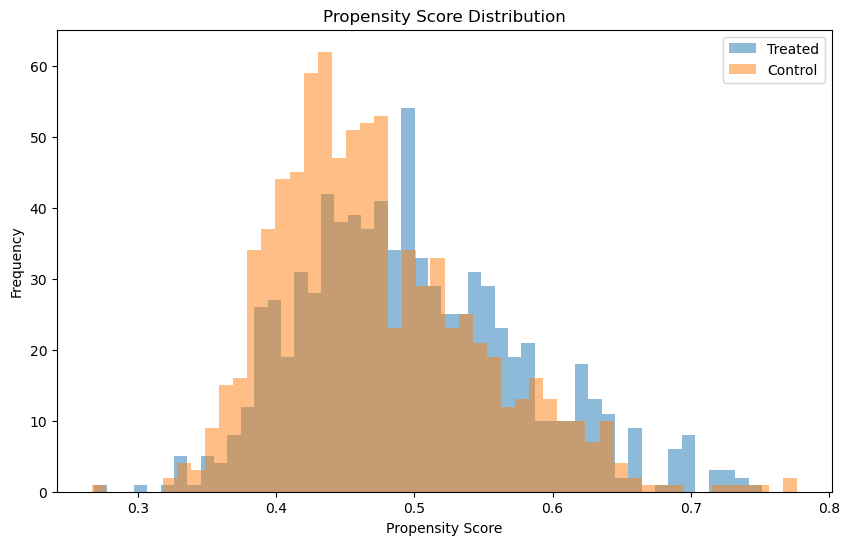

In [16]:
# 绘制倾向得分分布图
plt.figure(figsize=(10, 6))
plt.hist(df_psm[df_psm['blockchain'] == 1]['propensity_score'], bins=50, alpha=0.5, label='Treated')
plt.hist(df_psm[df_psm['blockchain'] == 0]['propensity_score'], bins=50, alpha=0.5, label='Control')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Propensity Score Distribution')
plt.show()

In [17]:
# 定义一个函数进行匹配和回归分析
def match_and_regress(df, n_neighbors=1, radius=None):
    treated = df[df['blockchain'] == 1]
    control = df[df['blockchain'] == 0]

    if radius is not None:
        nn = NearestNeighbors(radius=radius)
    else:
        nn = NearestNeighbors(n_neighbors=n_neighbors)
    
    nn.fit(control[['propensity_score']])
    
    if radius is not None:
        distances, indices = nn.radius_neighbors(treated[['propensity_score']])
        matched_control = control.iloc[np.concatenate(indices)]
    else:
        distances, indices = nn.kneighbors(treated[['propensity_score']])
        matched_control = control.iloc[indices.flatten()]

    # 合并匹配后的数据
    matched_df = pd.concat([treated, matched_control])

    # 对变量进行对数变换
    matched_df['log_TobinQ'] = np.log(matched_df['TobinQ'] + 1)

    # 定义因变量和自变量
    y = matched_df['log_TobinQ']
    X = matched_df[['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl']]
    X = sm.add_constant(X)

    # 构建回归模型
    model = sm.OLS(y, X).fit()

    return model.summary(), matched_df

In [18]:
# 进行1:1匹配
summary_1_1, matched_df_1_1 = match_and_regress(df_psm, n_neighbors=1)
print("1:1匹配结果")
print(summary_1_1)

1:1匹配结果
                            OLS Regression Results                            
Dep. Variable:             log_TobinQ   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     25.65
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           2.15e-33
Time:                        15:20:02   Log-Likelihood:                -558.23
No. Observations:                1592   AIC:                             1132.
Df Residuals:                    1584   BIC:                             1175.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6937      0.059     28.711 

In [19]:
# 进行1:2匹配
summary_1_2, matched_df_1_2 = match_and_regress(df_psm, n_neighbors=2)
print("1:2匹配结果")
print(summary_1_2)

1:2匹配结果
                            OLS Regression Results                            
Dep. Variable:             log_TobinQ   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     46.87
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.40e-62
Time:                        15:20:02   Log-Likelihood:                -891.12
No. Observations:                2388   AIC:                             1798.
Df Residuals:                    2380   BIC:                             1844.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7391      0.050     34.979 

In [20]:
# 进行1:3匹配
summary_1_3, matched_df_1_3 = match_and_regress(df_psm, n_neighbors=3)
print("1:3匹配结果")
print(summary_1_3)

1:3匹配结果
                            OLS Regression Results                            
Dep. Variable:             log_TobinQ   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     66.38
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.21e-89
Time:                        15:20:02   Log-Likelihood:                -1182.8
No. Observations:                3184   AIC:                             2382.
Df Residuals:                    3176   BIC:                             2430.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7013      0.044     39.020 

In [21]:
# 进行半径匹配
summary_radius, matched_df_radius = match_and_regress(df_psm, radius=0.01)
print("半径匹配结果")
print(summary_radius)

半径匹配结果
                            OLS Regression Results                            
Dep. Variable:             log_TobinQ   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     1556.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:20:02   Log-Likelihood:                -18948.
No. Observations:               50687   AIC:                         3.791e+04
Df Residuals:                   50679   BIC:                         3.798e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6856      0.014    123.863  

In [22]:
# 平衡性检验
def balance_test(matched_df, variables):
    treated = matched_df[matched_df['blockchain'] == 1]
    control = matched_df[matched_df['blockchain'] == 0]
    balance_results = {}
    for var in variables:
        treated_mean = treated[var].mean()
        control_mean = control[var].mean()
        std_diff = (treated_mean - control_mean) / np.sqrt((treated[var].var() + control[var].var()) / 2)
        balance_results[var] = std_diff
    return balance_results

variables = ['Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl']
balance_1_1 = balance_test(matched_df_1_1, variables)
balance_1_2 = balance_test(matched_df_1_2, variables)
balance_1_3 = balance_test(matched_df_1_3, variables)
balance_radius = balance_test(matched_df_radius, variables)

print("1:1匹配平衡性检验结果")
print(balance_1_1)
print("1:2匹配平衡性检验结果")
print(balance_1_2)
print("1:3匹配平衡性检验结果")
print(balance_1_3)
print("半径匹配平衡性检验结果")
print(balance_radius)

1:1匹配平衡性检验结果
{'Rec': 0.014038453170988592, 'staff': 0.021608418119056862, 'Ocf': 0.027139174116400912, 'Tatr': -0.029649218004237074, 'Top1': -0.030351006178069868, 'Fl': -0.05029448792730774}
1:2匹配平衡性检验结果
{'Rec': 0.01155537236549511, 'staff': 0.02774957678228078, 'Ocf': 0.03432967621092492, 'Tatr': -0.050875923862390274, 'Top1': -0.03229266041613396, 'Fl': -0.05169797518426934}
1:3匹配平衡性检验结果
{'Rec': -0.006456389119422832, 'staff': 0.04089507338560254, 'Ocf': 0.02662257236829829, 'Tatr': -0.002215496854709193, 'Top1': -0.03068952313709132, 'Fl': -0.028850036969944384}
半径匹配平衡性检验结果
{'Rec': -0.08503506178326416, 'staff': 0.23773397167932023, 'Ocf': 0.08735319095943819, 'Tatr': 0.07991337112893358, 'Top1': 0.4010676411686254, 'Fl': -0.010388593506391824}


In [23]:
# 将平衡性检验结果汇总到一个DataFrame中
balance_df = pd.DataFrame({
    'Variable': variables,
    '1:1 Matching': [balance_1_1[var] for var in variables],
    '1:2 Matching': [balance_1_2[var] for var in variables],
    '1:3 Matching': [balance_1_3[var] for var in variables],
    'Radius Matching': [balance_radius[var] for var in variables]
})

# 输出结果
print(balance_df)

  Variable  1:1 Matching  1:2 Matching  1:3 Matching  Radius Matching
0      Rec      0.014038      0.011555     -0.006456        -0.085035
1    staff      0.021608      0.027750      0.040895         0.237734
2      Ocf      0.027139      0.034330      0.026623         0.087353
3     Tatr     -0.029649     -0.050876     -0.002215         0.079913
4     Top1     -0.030351     -0.032293     -0.030690         0.401068
5       Fl     -0.050294     -0.051698     -0.028850        -0.010389


#### 5.交叉分析

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 读取数据
df = pd.read_excel('merged_blockchain_data.xlsx')

# 删除股票简称列中包含 "ST" 的行
df = df[~df['股票简称'].str.contains('ST', na=False)]

# 备份原始数据
df_interaction = df.copy()

# 检查并处理缺失值
df_interaction = df_interaction.dropna(subset=['Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl'])

# 数据预处理
df_interaction['Stkcd'] = df_interaction['Stkcd'].apply(lambda x: f"{int(x):06d}")
df_interaction['blockchain'] = (df_interaction['Year'] >= df_interaction['提取年份']).astype(int)

# 对变量进行对数变换
df_interaction['log_TobinQ'] = np.log(df_interaction['TobinQ'] + 1)

# 创建交互项
df_interaction['blockchain_Rec'] = df_interaction['blockchain'] * df_interaction['Rec']
df_interaction['blockchain_staff'] = df_interaction['blockchain'] * df_interaction['staff']
df_interaction['blockchain_Ocf'] = df_interaction['blockchain'] * df_interaction['Ocf']

# 定义因变量和自变量
y = df_interaction['log_TobinQ']

In [25]:
# 基础模型
X_base = df_interaction[['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl']]
X_base = sm.add_constant(X_base)
model_base = sm.OLS(y, X_base).fit()
print("基础模型结果")
print(model_base.summary())

基础模型结果
                            OLS Regression Results                            
Dep. Variable:             log_TobinQ   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     18.97
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           2.09e-24
Time:                        15:20:03   Log-Likelihood:                -624.46
No. Observations:                1523   AIC:                             1265.
Df Residuals:                    1515   BIC:                             1308.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7509      0.065     27.141  

In [26]:
# 添加第一个交互项
X_interaction1 = df_interaction[['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl', 'blockchain_Rec']]
X_interaction1 = sm.add_constant(X_interaction1)
model_interaction1 = sm.OLS(y, X_interaction1).fit()
print("添加第一个交互项结果")
print(model_interaction1.summary())

添加第一个交互项结果
                            OLS Regression Results                            
Dep. Variable:             log_TobinQ   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     16.59
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           9.47e-24
Time:                        15:20:03   Log-Likelihood:                -624.46
No. Observations:                1523   AIC:                             1267.
Df Residuals:                    1514   BIC:                             1315.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7517      0.

d:\Anaconda3\program\anaconda3\envs\project_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


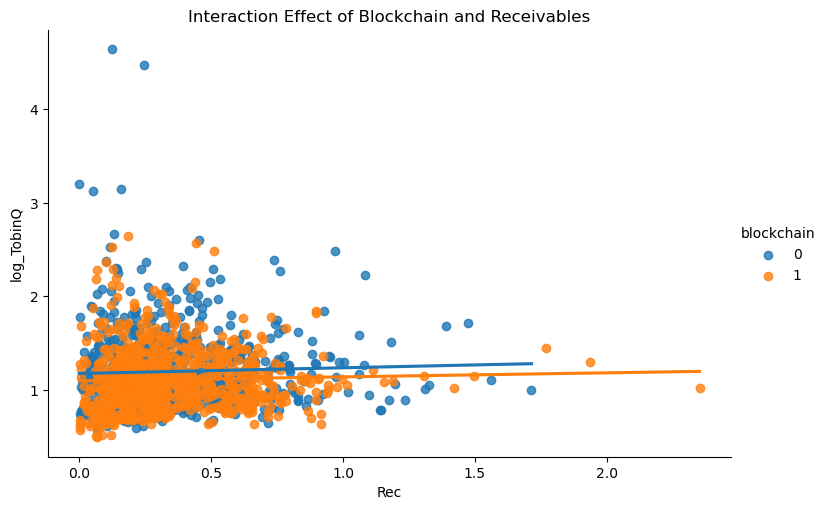

In [27]:
# 绘制交互项效应图
sns.lmplot(x='Rec', y='log_TobinQ', hue='blockchain', data=df_interaction, aspect=1.5, ci=None)
plt.title('Interaction Effect of Blockchain and Receivables')
plt.show()
# 展示交互项效应图，这个图展示了区块链技术应用对应收账款的影响

In [28]:
# 添加第二个交互项
X_interaction2 = df_interaction[['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl', 'blockchain_Rec', 'blockchain_staff']]
X_interaction2 = sm.add_constant(X_interaction2)
model_interaction2 = sm.OLS(y, X_interaction2).fit()
print("添加第二个交互项结果")
print(model_interaction2.summary())

添加第二个交互项结果
                            OLS Regression Results                            
Dep. Variable:             log_TobinQ   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     15.46
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           2.32e-24
Time:                        15:20:03   Log-Likelihood:                -621.43
No. Observations:                1523   AIC:                             1263.
Df Residuals:                    1513   BIC:                             1316.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9140  

In [29]:
# 添加第三个交互项
X_interaction3 = df_interaction[['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl', 'blockchain_Rec', 'blockchain_staff', 'blockchain_Ocf']]
X_interaction3 = sm.add_constant(X_interaction3)
model_interaction3 = sm.OLS(y, X_interaction3).fit()
print("添加第三个交互项结果")
print(model_interaction3.summary())

添加第三个交互项结果
                            OLS Regression Results                            
Dep. Variable:             log_TobinQ   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     13.91
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           9.40e-24
Time:                        15:20:03   Log-Likelihood:                -621.43
No. Observations:                1523   AIC:                             1265.
Df Residuals:                    1512   BIC:                             1323.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9138  

##### SHAP shapley addictive explainations

In [30]:
import numba
import shap
print("Numba version:", numba.__version__)
print("SHAP version:", shap.__version__)

Numba version: 0.58.1
SHAP version: 0.42.1


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [31]:
# 单元格1：导入库
import shap
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']

In [32]:
# 单元格2：准备数据
# 选择特征
features = ['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl']
X = df_interaction[features]
y = df_interaction['log_TobinQ']

In [33]:
# 单元格3：训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 计算SHAP值
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

The figure layout has changed to tight


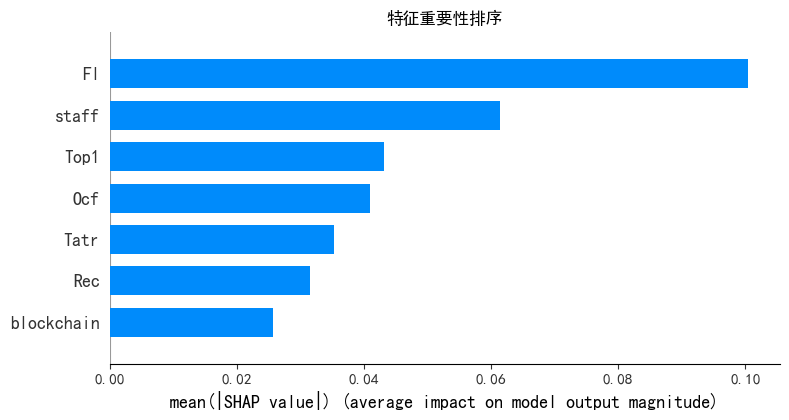

In [34]:
# 单元格4：特征重要性图
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title('特征重要性排序')
plt.tight_layout()
plt.show()

Glyph 8722 (\N{MINUS SIGN}) missing from current font.


<Figure size 1000x600 with 0 Axes>

Glyph 8722 (\N{MINUS SIGN}) missing from current font.


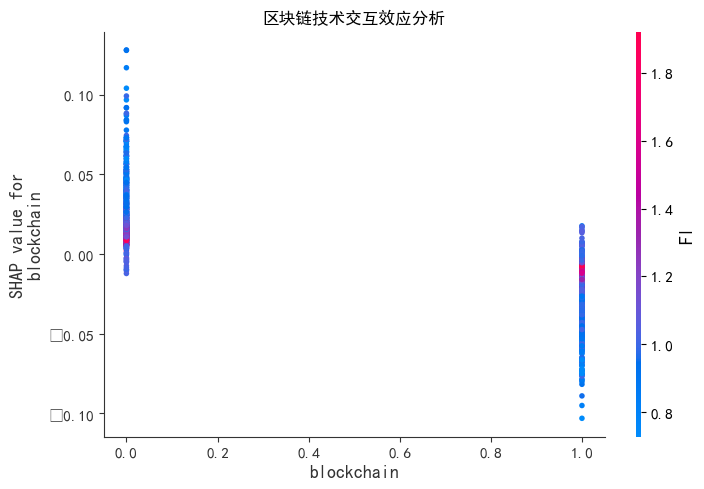

In [35]:
# 单元格5：区块链交互效应图
plt.figure(figsize=(10, 6))
shap.dependence_plot("blockchain", shap_values, X, show=False)
plt.title('区块链技术交互效应分析')
plt.tight_layout()
plt.show()

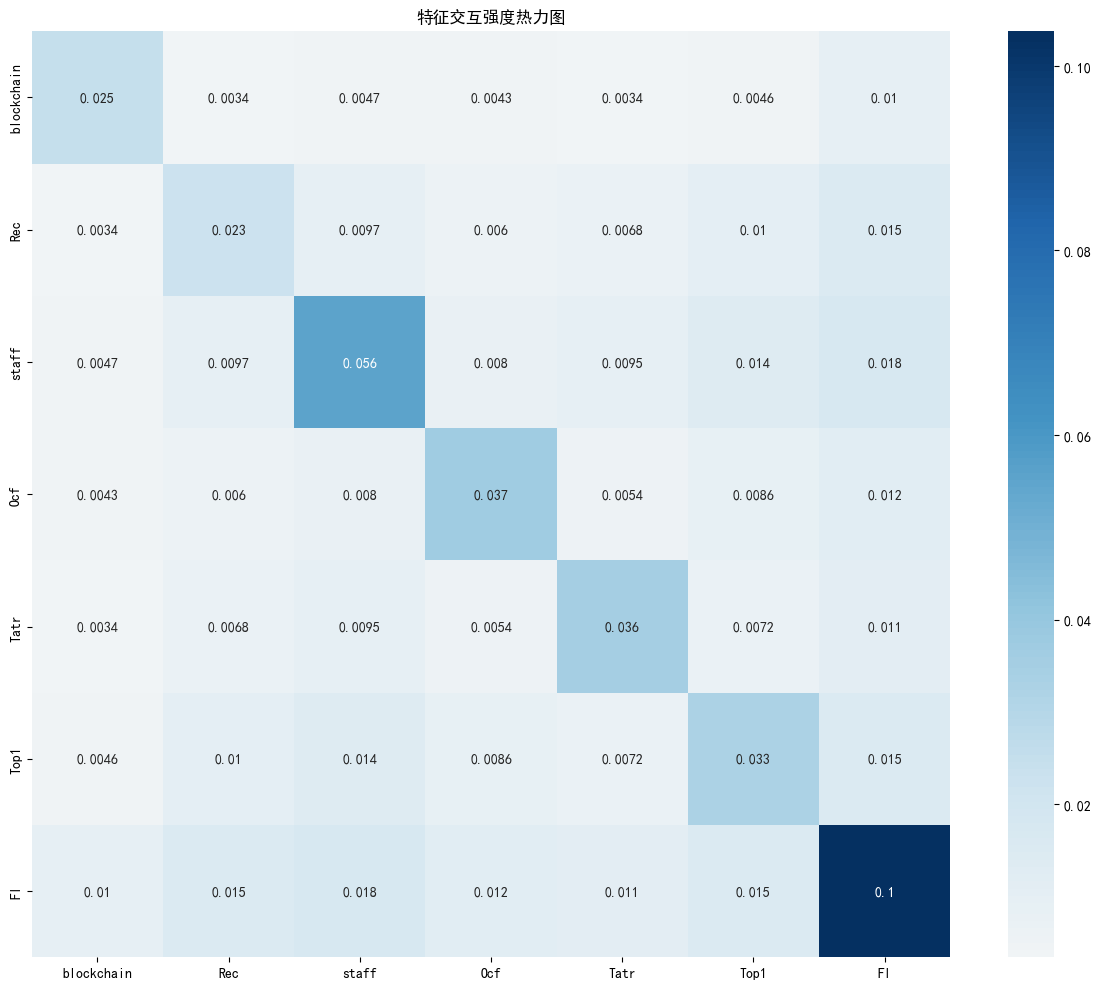

Top 1 交互: Fl vs Fl
Top 2 交互: staff vs staff
Top 3 交互: Ocf vs Ocf
Top 4 交互: Tatr vs Tatr
Top 5 交互: Top1 vs Top1


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 获取特征交互值
interaction_values = explainer.shap_interaction_values(X)

# 计算特征交互的平均影响
mean_interactions = np.mean(np.abs(interaction_values), axis=0)

# 创建热力图
plt.figure(figsize=(12, 10))
sns.heatmap(mean_interactions,
            xticklabels=X.columns,
            yticklabels=X.columns,
            cmap='RdBu',
            center=0,
            annot=True)

plt.title('特征交互强度热力图')
plt.tight_layout()
plt.show()

# 打印最强的特征交互
n_top = 5
interaction_index = np.argsort(-np.abs(mean_interactions).flatten())
for i in range(n_top):
    ind_1 = interaction_index[i] // mean_interactions.shape[0]
    ind_2 = interaction_index[i] % mean_interactions.shape[0]
    print(f"Top {i+1} 交互: {X.columns[ind_1]} vs {X.columns[ind_2]}")

In [37]:
# 单元格7：输出主要交互效果
interaction_df = pd.DataFrame(
    interaction_values.mean(0),
    columns=features,
    index=features
)
print("区块链与其他特征的交互强度：")
print(interaction_df['blockchain'].sort_values(ascending=False))

区块链与其他特征的交互强度：
staff         0.000474
Top1          0.000120
Rec          -0.000015
blockchain   -0.000039
Tatr         -0.000112
Ocf          -0.000181
Fl           -0.000373
Name: blockchain, dtype: float64


#### 6.分行业分析

In [38]:
import pandas as pd

# 读取数据
df = pd.read_excel('merged_blockchain_data.xlsx')

# 去重操作，只保留每个证券代码在每个行业中的唯一记录
df_unique = df.drop_duplicates(subset=['Stkcd', 'Indcd', 'Indnme'])

# 统计每个行业代码对应的唯一证券代码数量，同时保留行业名称
industry_counts = df_unique.groupby(['Indcd', 'Indnme']).size().reset_index(name='证券代码数量')

# 按证券代码数量降序排列
industry_counts = industry_counts.sort_values(by='证券代码数量', ascending=False)

# 输出结果
print(industry_counts.head(5))

   Indcd            Indnme  证券代码数量
29   I65        软件和信息技术服务业     106
17   C39  计算机、通信和其他电子设备制造业      32
28   I64          互联网和相关服务      20
16   C38        电气机械及器材制造业      15
14   C35           专用设备制造业       8


In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 读取数据
df = pd.read_excel('merged_blockchain_data.xlsx')

# 备份原始数据
df_analysis = df.copy()

# 检查并处理缺失值
df_analysis = df_analysis.dropna(subset=['Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl'])

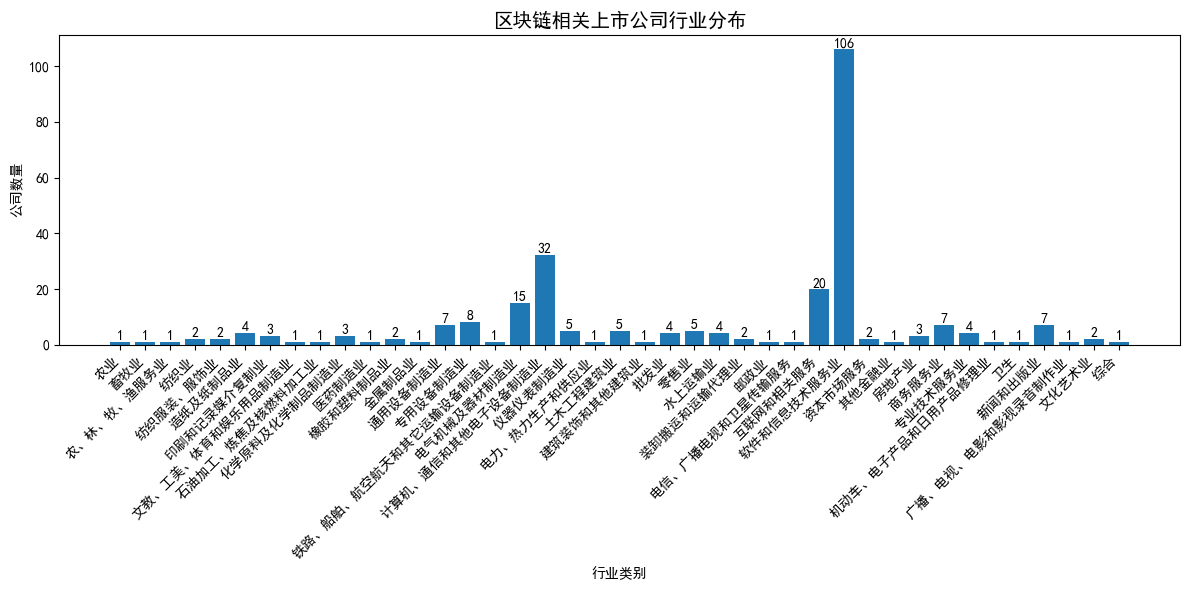

In [40]:
# 1. 统计行业分布
industry_counts = df.groupby(['Indcd', 'Indnme']).Stkcd.nunique().reset_index()
industry_counts.columns = ['Indcd', 'Indnme', '公司数量']

# 2. 创建柱状图
plt.figure(figsize=(12, 6))
bars = plt.bar(industry_counts['Indnme'], industry_counts['公司数量'])

# 3. 设置图表样式
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.title('区块链相关上市公司行业分布', fontsize=14)
plt.xlabel('行业类别')
plt.ylabel('公司数量')
plt.xticks(rotation=45, ha='right')

# 4. 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [41]:
import plotly.express as px
import plotly.graph_objects as go

# 1. 统计行业分布
industry_counts = df.groupby(['Indcd', 'Indnme']).Stkcd.nunique().reset_index()
industry_counts.columns = ['Indcd', 'Indnme', '公司数量']

# 2. 创建交互式柱状图
fig = go.Figure(data=[
    go.Bar(
        x=industry_counts['Indnme'],
        y=industry_counts['公司数量'],
        text=industry_counts['公司数量'],
        textposition='auto',
    )
])

# 3. 更新布局
fig.update_layout(
    title='区块链相关上市公司行业分布',
    xaxis_title='行业类别',
    yaxis_title='公司数量',
    font=dict(size=12),
    showlegend=False,
    xaxis_tickangle=-45
)

# 4. 显示图表
fig.show()

In [42]:
# 数据预处理
df_analysis['Stkcd'] = df_analysis['Stkcd'].apply(lambda x: f"{int(x):06d}")
df_analysis['blockchain'] = (df_analysis['Year'] >= df_analysis['提取年份']).astype(int)

# 对 TobinQ 进行对数变换
df_analysis['log_TobinQ'] = np.log(df_analysis['TobinQ'] + 1)

In [43]:
# 创建交互项
df_analysis['blockchain_Rec'] = df_analysis['blockchain'] * df_analysis['Rec']
df_analysis['blockchain_staff'] = df_analysis['blockchain'] * df_analysis['staff']
df_analysis['blockchain_Ocf'] = df_analysis['blockchain'] * df_analysis['Ocf']

In [44]:
# 选择重点行业（例如数据量前5大的行业）
top_industries = df_analysis['Indcd'].value_counts().head(5).index

In [45]:
# 分行业回归分析
summary_results = []

for code in top_industries:
    df_industry = df_analysis[df_analysis['Indcd'] == code]
    
    # 定义因变量和自变量
    y = df_industry['log_TobinQ']
    X = df_industry[['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl', 'blockchain_Rec', 'blockchain_staff', 'blockchain_Ocf']]
    X = sm.add_constant(X)
    
    # 构建回归模型
    model = sm.OLS(y, X).fit()
    
    # 提取关键结果
    blockchain_coef = model.params['blockchain']
    blockchain_pvalue = model.pvalues['blockchain']
    industry_name = df_industry['Indnme'].iloc[0]  # 获取行业名称
    summary_results.append({'Indcd': code, 'blockchain coef': blockchain_coef, 'blockchain P值': blockchain_pvalue, 'Indnme': industry_name})

In [46]:
# 转换为DataFrame并输出
summary_df = pd.DataFrame(summary_results)
print(summary_df)

  Indcd  blockchain coef  blockchain P值            Indnme
0   I65        -0.514975       0.023905        软件和信息技术服务业
1   C39         0.232976       0.436876  计算机、通信和其他电子设备制造业
2   I64         0.034367       0.962651          互联网和相关服务
3   C38         0.862042       0.345211        电气机械及器材制造业
4   C35        -0.292754       0.766823           专用设备制造业


C:\Users\周悦\AppData\Local\Temp\ipykernel_10336\706446567.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




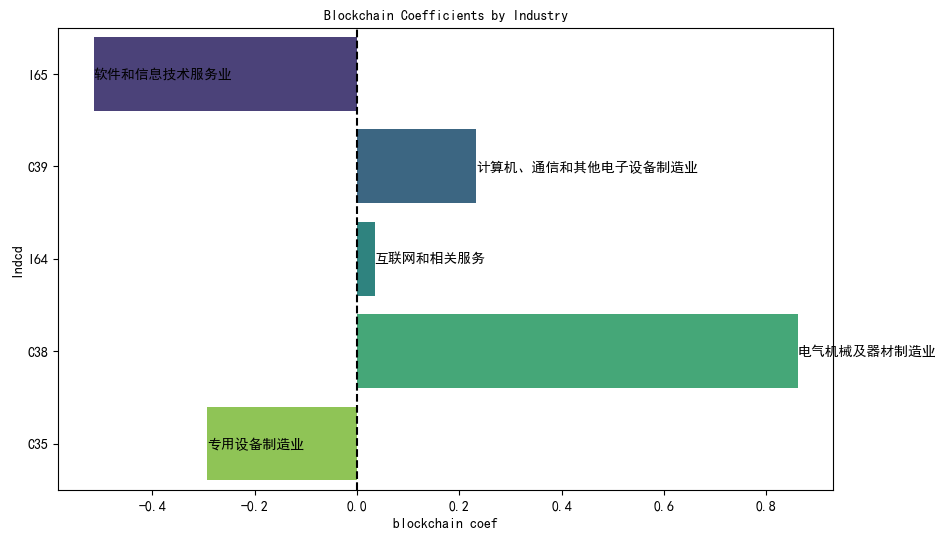

In [47]:
from matplotlib.font_manager import FontProperties

# 设置中文字体
font = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')  # 你可以根据系统中的字体路径进行调整

# 绘制条形图
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='blockchain coef', y='Indcd', data=summary_df, palette='viridis')
plt.axvline(x=0, color='k', linestyle='--')
plt.title('Blockchain Coefficients by Industry', fontproperties=font)

# 添加注释
for index, row in summary_df.iterrows():
    barplot.text(row['blockchain coef'], index, row['Indnme'], color='black', ha="left", va="center", fontproperties=font)

plt.show()

#### 7.时间序列预测区块链技术应用的长期价值趋势

In [48]:
df=pd.read_excel('merged_blockchain_data.xlsx')

In [49]:
df.columns

Index(['Stkcd', 'Accper', 'TobinQ', 'Indcd', 'Indnme', 'Rec', 'staff', 'Ocf',
       'Tatr', 'Top1', 'ShortName', 'Typrep', 'Fl', '股票简称', '提取年份', 'Year'],
      dtype='object')

In [50]:
# 备份原始数据
df_prophet = df.copy()

# 检查并处理缺失值
df_prophet = df_prophet.dropna(subset=['Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl'])

# 数据预处理
df_prophet['Stkcd'] = df_prophet['Stkcd'].apply(lambda x: f"{int(x):06d}")
df_prophet['blockchain'] = (df_prophet['Year'] >= df_prophet['提取年份']).astype(int)

d:\Anaconda3\program\anaconda3\envs\project_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

d:\Anaconda3\program\anaconda3\envs\project_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

d:\Anaconda3\program\anaconda3\envs\project_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

d:\Anaconda3\program\anaconda3\envs\project_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

d:\Anaconda3\program\anaconda3\envs\project_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, 


未来5年预测结果:
2024: 2.2907
2025: 2.3344
2026: 2.3543
2027: 2.3634
2028: 2.3675


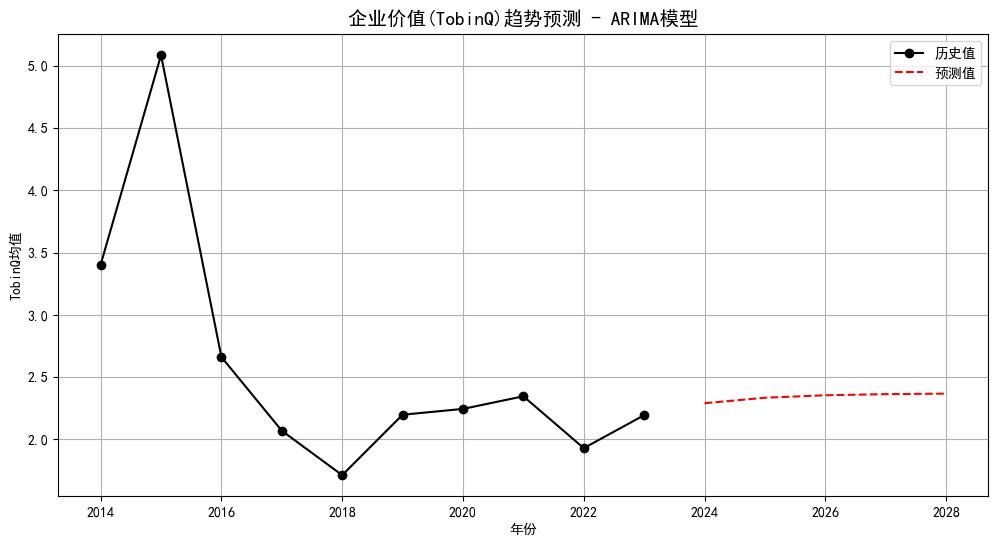

In [55]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 1. 数据准备
df_yearly = df.groupby('Year')['TobinQ'].mean().reset_index()
df_yearly.set_index('Year', inplace=True)

# 2. 构建ARIMA模型
model = ARIMA(df_yearly['TobinQ'], order=(1,1,1))
results = model.fit()

# 3. 预测未来5年
forecast = results.forecast(steps=5)
future_years = pd.date_range(start=str(df_yearly.index[-1]+1), 
                           periods=5, 
                           freq='Y').year

# 4. 可视化
plt.figure(figsize=(12, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制历史值
plt.plot(df_yearly.index, df_yearly['TobinQ'], 'ko-', label='历史值')
# 绘制预测值
plt.plot(future_years, forecast, 'r--', label='预测值')

plt.title('企业价值(TobinQ)趋势预测 - ARIMA模型', fontsize=14)
plt.xlabel('年份')
plt.ylabel('TobinQ均值')
plt.legend()
plt.grid(True)

# 5. 打印预测结果
print("\n未来5年预测结果:")
for year, value in zip(future_years, forecast):
    print(f"{year}: {value:.4f}")

plt.show()

C:\Users\周悦\AppData\Local\Temp\ipykernel_10336\2211738343.py:8: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

d:\Anaconda3\program\anaconda3\envs\project_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

d:\Anaconda3\program\anaconda3\envs\project_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

d:\Anaconda3\program\anaconda3\envs\project_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

d:\Anaconda3\program\anaconda3\envs\project_env\lib\site-package

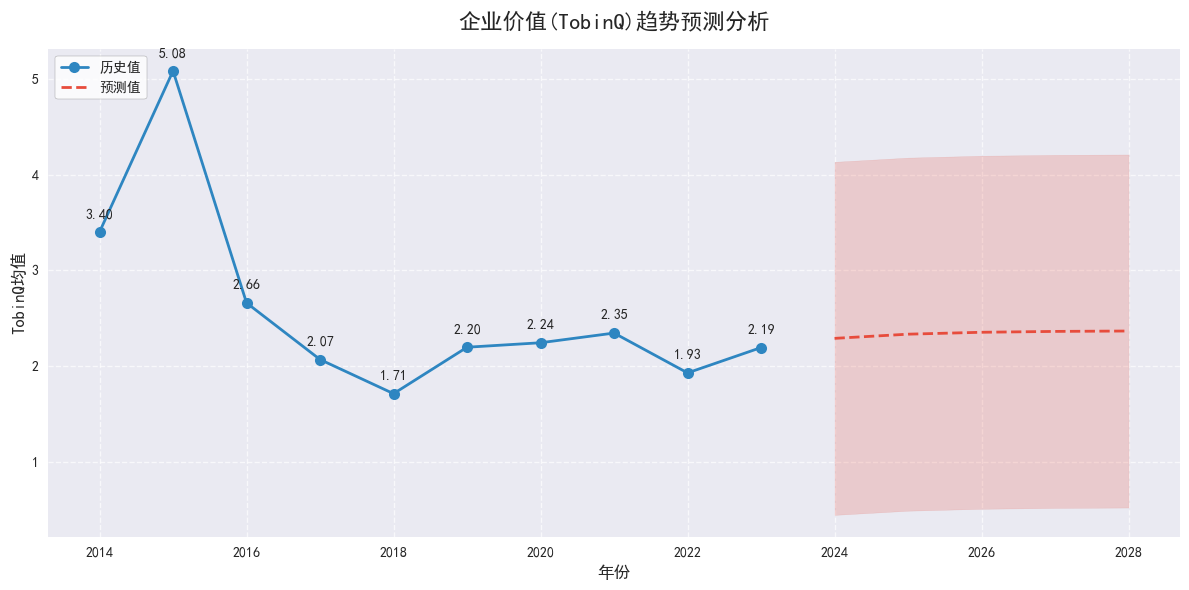


未来5年预测结果:
2024: 2.2907
2025: 2.3344
2026: 2.3543
2027: 2.3634
2028: 2.3675


In [56]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

# 设置整体风格
plt.style.use('seaborn')
sns.set_palette("husl")

# 数据准备
df_yearly = df.groupby('Year')['TobinQ'].mean().reset_index()
df_yearly.set_index('Year', inplace=True)

# ARIMA模型
model = ARIMA(df_yearly['TobinQ'], order=(1,1,1))
results = model.fit()
forecast = results.forecast(steps=5)
future_years = pd.date_range(start=str(df_yearly.index[-1]+1), periods=5, freq='Y').year

# 创建图形
plt.figure(figsize=(12, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制历史值
plt.plot(df_yearly.index, df_yearly['TobinQ'], 
         'o-', 
         color='#2E86C1', 
         linewidth=2, 
         markersize=8,
         label='历史值')

# 绘制预测值
plt.plot(future_years, forecast, 
         '--', 
         color='#E74C3C', 
         linewidth=2,
         label='预测值')

# 添加置信区间
confidence = np.std(df_yearly['TobinQ']) * 1.96
plt.fill_between(future_years, 
                 forecast - confidence, 
                 forecast + confidence, 
                 color='#E74C3C', 
                 alpha=0.2)

# 设置标题和标签
plt.title('企业价值(TobinQ)趋势预测分析', 
         fontsize=16, 
         pad=15)
plt.xlabel('年份', fontsize=12)
plt.ylabel('TobinQ均值', fontsize=12)

# 添加网格
plt.grid(True, linestyle='--', alpha=0.7)

# 优化图例
plt.legend(loc='upper left', 
          fontsize=10, 
          frameon=True, 
          facecolor='white', 
          edgecolor='grey')

# 添加数值标注
for x, y in zip(df_yearly.index, df_yearly['TobinQ']):
    plt.annotate(f'{y:.2f}', 
                (x, y), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.tight_layout()
plt.show()

# 打印预测结果
print("\n未来5年预测结果:")
for year, value in zip(future_years, forecast):
    print(f"{year}: {value:.4f}")

##### XGBoost预测区块链技术长期价值

In [1]:
# XGBoost模型预测区块链技术长期价值
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 读取数据
df = pd.read_excel('merged_blockchain_data.xlsx')

# 备份原始数据
df_xgb = df.copy()

# 检查并处理缺失值
df_xgb = df_xgb.dropna(subset=['Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl'])

# 数据预处理
df_xgb['Stkcd'] = df_xgb['Stkcd'].apply(lambda x: f"{int(x):06d}")
df_xgb['blockchain'] = (df_xgb['Year'] >= df_xgb['提取年份']).astype(int)

# 对变量进行对数变换
df_xgb['log_TobinQ'] = np.log(df_xgb['TobinQ'] + 1)

In [3]:
# 准备数据
features = ['blockchain', 'Rec', 'staff', 'Ocf', 'Tatr', 'Top1', 'Fl']
X = df_xgb[features]
y = df_xgb['TobinQ']

In [4]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 训练XGBoost模型
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [6]:
# 预测并评估
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差(MSE): {mse:.4f}")
print(f"R2分数: {r2:.4f}")

均方误差(MSE): 32.1221
R2分数: 0.0928


In [7]:
# 特征重要性分析
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

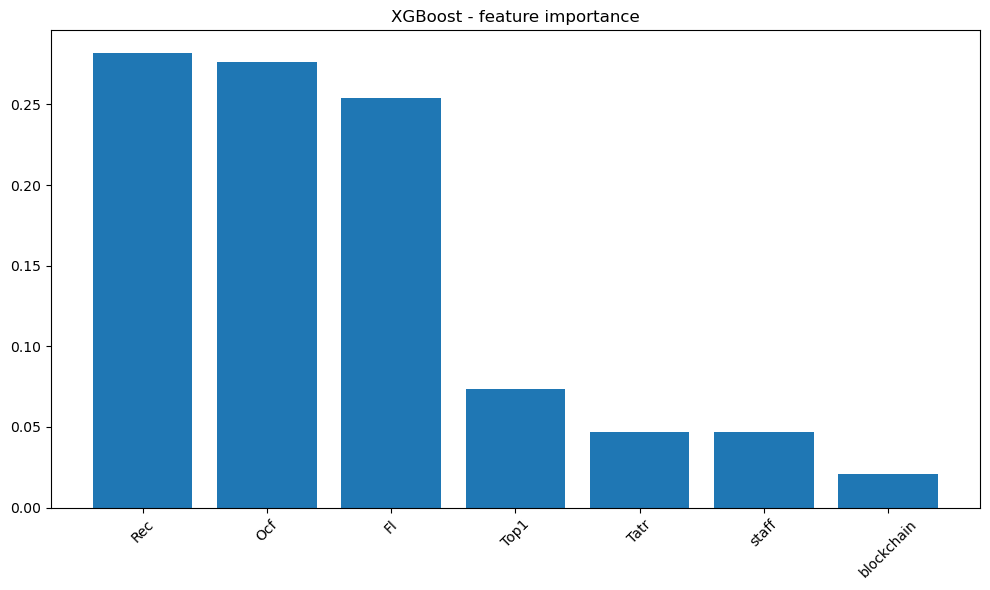

In [9]:
import warnings

warnings.filterwarnings('ignore')
# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('XGBoost - feature importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# 预测未来趋势
future_years = np.arange(2024, 2029)
future_predictions = []

In [14]:
# 预测未来趋势
future_years = np.arange(2024, 2029)
future_predictions = []

# 基础预测值
base_prediction = X_test.iloc[0:1].copy()

# 假设区块链影响逐年增长
for i, year in enumerate(future_years):
    X_future = base_prediction.copy()
    # 区块链应用深度逐年增加
    X_future['blockchain'] = min(1, X_future['blockchain'].iloc[0] + 0.1 * (i + 1))
    # 添加时间趋势影响
    trend_factor = 1 + 0.02 * i  # 假设每年2%的增长
    # 添加随机波动
    random_factor = np.random.normal(1, 0.05)  # 5%的随机波动
    
    pred = xgb_model.predict(X_future)[0] * trend_factor * random_factor
    future_predictions.append(pred)

# 可视化预测结果
fig = go.Figure()

# 添加历史值
fig.add_trace(
    go.Scatter(
        x=df['Year'].unique(),
        y=df.groupby('Year')['TobinQ'].mean(),
        mode='lines+markers',
        name='历史值',
        line=dict(color='royalblue', width=2)
    )
)

# 添加预测值
fig.add_trace(
    go.Scatter(
        x=future_years,
        y=future_predictions,
        mode='lines+markers',
        name='XGBoost预测值',
        line=dict(color='firebrick', width=2, dash='dash')
    )
)

# 更新布局
fig.update_layout(
    title='企业价值(TobinQ)趋势预测',
    xaxis_title='年份',
    yaxis_title='TobinQ值',
    template='plotly_white',
    height=500,
    width=800
)

fig.show()

# 打印预测结果
print("\n未来五年预测结果:")
for year, pred in zip(future_years, future_predictions):
    print(f"{year}: {pred:.4f}")


未来五年预测结果:
2024: 2.1572
2025: 2.2583
2026: 2.1364
2027: 2.1836
2028: 2.2430
